In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline#for encoding
from sklearn.preprocessing import LabelEncoder#for train test splitting
from sklearn.model_selection import train_test_split#for decision tree object
from sklearn.tree import DecisionTreeClassifier#for checking testing results
from sklearn.metrics import classification_report, confusion_matrix#for visualizing tree
from sklearn.tree import plot_tree

UsageError: unrecognized arguments: encoding


In [4]:
# Pandas is used for data manipulation
import pandas as pd
# Read in data and display first 5 rows
features = pd.read_csv('/content/Company_Data.csv')
features.head(5)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [5]:
#getting information of dataset
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
print('The shape of our features is:', features.shape)

The shape of our features is: (400, 11)


In [7]:
features.isnull().any()

,0
Sales,False
CompPrice,False
Income,False
Advertising,False
Population,False
Price,False
ShelveLoc,False
Age,False
Education,False
Urban,False


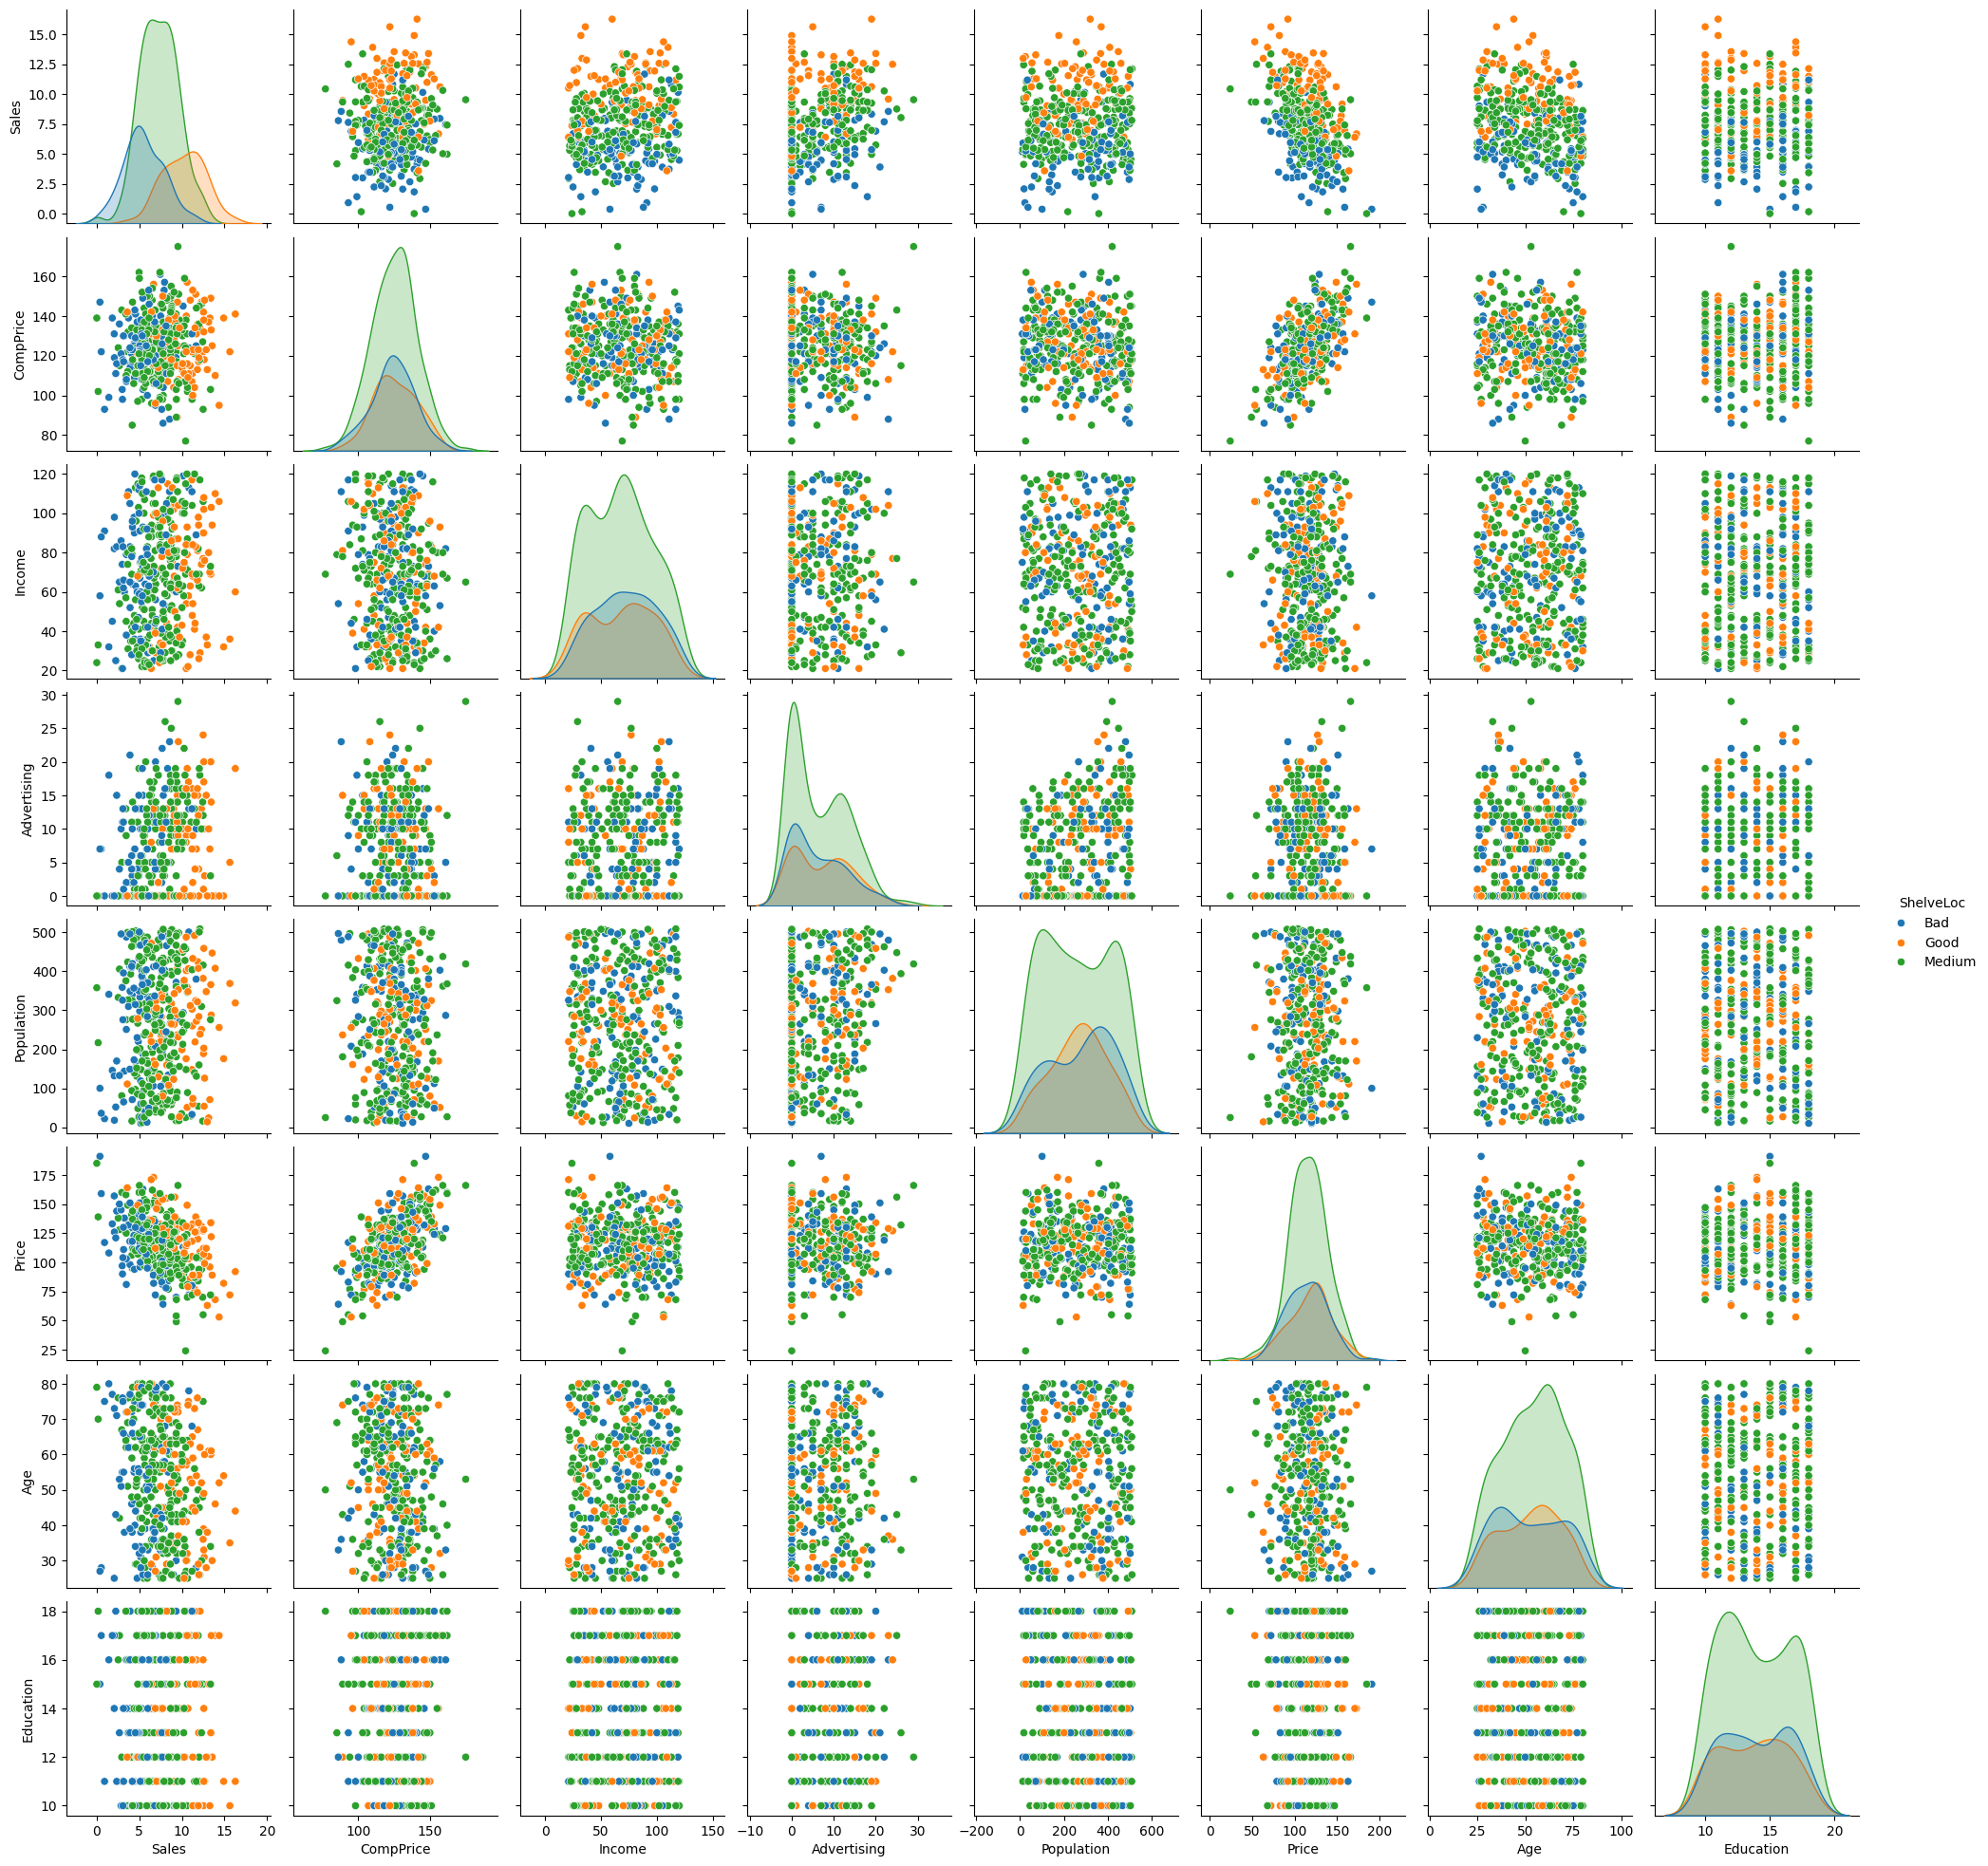

In [8]:
# let's plot pair plot to visualise the attributes all at once
sns.pairplot(data=features, hue = 'ShelveLoc')

In [9]:
#Creating dummy vairables dropping first dummy variable
df=pd.get_dummies(features,columns=['Urban','US'], drop_first=True)

In [10]:
print(df.head())

   Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education  Urban_Yes  US_Yes  
0         17       True    True  
1         10       True    True  
2         12       True    True  
3         14       True    True  
4         13       True   False  


In [11]:
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

In [12]:
df['ShelveLoc']=df['ShelveLoc'].map({'Good':1,'Medium':2,'Bad':3})

In [13]:
print(df.head())

   Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0   9.50        138      73           11         276    120          3   42   
1  11.22        111      48           16         260     83          1   65   
2  10.06        113      35           10         269     80          2   59   
3   7.40        117     100            4         466     97          2   55   
4   4.15        141      64            3         340    128          3   38   

   Education  Urban_Yes  US_Yes  
0         17       True    True  
1         10       True    True  
2         12       True    True  
3         14       True    True  
4         13       True   False  


In [14]:
x=df.iloc[:,0:6]
y=df['ShelveLoc']
x

,Sales,CompPrice,Income,Advertising,Population,Price
0,9.50,138,73,11,276,120
1,11.22,111,48,16,260,83
2,10.06,113,35,10,269,80
3,7.40,117,100,4,466,97
4,4.15,141,64,3,340,128
...,...,...,...,...,...,...
395,12.57,138,108,17,203,128
396,6.14,139,23,3,37,120
397,7.41,162,26,12,368,159
398,5.94,100,79,7,284,95


In [15]:
y

,ShelveLoc
0,3
1,1
2,2
3,2
4,3
...,...
395,1
396,2
397,2
398,3


In [16]:
df['ShelveLoc'].unique()

array([3, 1, 2])

In [17]:
df.ShelveLoc.value_counts()

,count
ShelveLoc,
2,219
3,96
1,85


In [18]:
colnames = list(df.columns)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban_Yes',
 'US_Yes']

In [19]:
# Descriptive statistics for each column
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,2.027500,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,0.672961,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,1.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,2.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,2.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,2.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,3.000000,80.000000,18.000000


In [20]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,3,42,17,True,True
1,11.22,111,48,16,260,83,1,65,10,True,True
2,10.06,113,35,10,269,80,2,59,12,True,True
3,7.40,117,100,4,466,97,2,55,14,True,True
4,4.15,141,64,3,340,128,3,38,13,True,False


In [21]:
# Labels are the values we want to predict
labels = np.array(df['Income'])
# Remove the labels from the features
# axis 1 refers to the columns
features= df.drop('Income', axis = 1)
# Saving feature names for later use
feature_list = list(df.columns)
# Convert to numpy array
features = np.array(df)

In [22]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [23]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (300, 11)
Training Labels Shape: (300,)
Testing Features Shape: (100, 11)
Testing Labels Shape: (100,)


# Establish Baseline

In [24]:
# The baseline predictions are the historical averages
baseline_preds = test_features[:, feature_list.index('Sales')]
# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  65.26


In [25]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [26]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.27 degrees.


Determine Performance Metrics

In [27]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy

accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 99.58 %.


In [28]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

In [29]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_labels)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

In [30]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Income               Importance: 1.0
Variable: Sales                Importance: 0.0
Variable: CompPrice            Importance: 0.0
Variable: Advertising          Importance: 0.0
Variable: Population           Importance: 0.0
Variable: Price                Importance: 0.0
Variable: ShelveLoc            Importance: 0.0
Variable: Age                  Importance: 0.0
Variable: Education            Importance: 0.0
Variable: Urban_Yes            Importance: 0.0
Variable: US_Yes               Importance: 0.0


In [31]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)
# Extract the two most important features
important_indices = [feature_list.index('Sales'), feature_list.index('Income')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]
# Train the random forest
rf_most_important.fit(train_important, train_labels)
# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_labels)
# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')


Mean Absolute Error: 0.16 degrees.
Accuracy: 99.75 %.


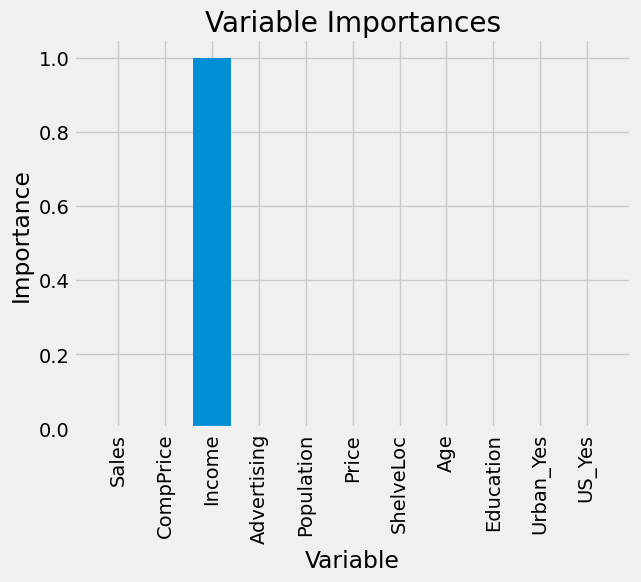

In [32]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');